# Final Project - Machine Learning 2024/25

### Unsupervised Learning algorithms - Finding patterns in the data



### load packages and preprocessed data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
os.environ["OMP_NUM_THREADS"] = "4"
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats
from sklearn.neighbors import NearestNeighbors


In [2]:
# import the dataset we want 
# read preprocessed data
data = pd.read_csv("data1/preprocessedData.csv") 
if 'Unnamed: 0' in data.columns:
    data = data.drop(['Unnamed: 0'], axis=1)
if len(data) > 10000:
    data = data.sample(n = 10000, random_state=0)
# separate the predictors and the criterion variable
trainCrit = data['Heart_Disease']  
#data = data.drop('Heart_Disease', axis=1)  
data


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
119925,3,5,1,1,0,0,0,0,1,1,82,152.0,44.91,19.33,1,2.0,16.0,0.0,16.0
205900,4,5,1,0,0,0,0,0,0,1,21,160.0,72.57,28.34,0,5.0,16.0,4.0,16.0
272851,2,5,1,0,0,0,0,0,1,0,72,185.0,106.59,31.00,0,0.0,30.0,16.0,4.0
277153,4,4,0,0,0,0,0,1,1,1,72,173.0,68.49,22.96,1,30.0,30.0,30.0,15.0
294269,4,5,1,0,0,0,0,0,1,1,72,155.0,61.23,25.51,0,3.0,90.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142954,4,2,0,0,0,0,0,0,0,0,27,183.0,124.74,37.30,0,0.0,1.0,2.0,4.0
170951,3,4,1,0,0,0,1,0,0,0,32,170.0,73.94,25.53,0,0.0,60.0,4.0,4.0
205458,4,5,1,1,0,1,0,0,1,0,72,173.0,92.08,30.87,1,1.0,90.0,60.0,0.0
248984,4,5,1,0,0,0,0,0,1,0,72,165.0,81.65,29.95,0,1.0,60.0,30.0,8.0


In [3]:
data.mean(axis=0)

General_Health                    3.533600
Checkup                           4.617200
Exercise                          0.776900
Heart_Disease                     0.077800
Skin_Cancer                       0.097400
Other_Cancer                      0.097500
Depression                        0.206100
Diabetes                          0.141300
Arthritis                         0.323800
Sex                               0.514200
Age_Category                     54.665500
Height_(cm)                     170.701400
Weight_(kg)                      83.471868
BMI                              28.559199
Smoking_History                   0.407500
Alcohol_Consumption               4.933800
Fruit_Consumption                29.621000
Green_Vegetables_Consumption     15.135500
FriedPotato_Consumption           6.258100
dtype: float64

In [4]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

normalized_data = data.copy()
normalized_data = normalized_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

## 1. PCA

Variance captured by the first component: 13.52%
Variance captured by the second component: 12.48%


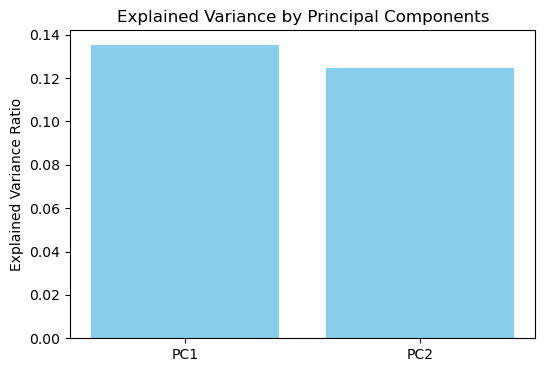

In [5]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standardized_data)
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Print the variance captured by each component
print(f"Variance captured by the first component: {explained_variance_ratio[0]:.2%}")
print(f"Variance captured by the second component: {explained_variance_ratio[1]:.2%}")
# Plot the explained variance for the two components
plt.figure(figsize=(6, 4))
plt.bar(['PC1', 'PC2'], explained_variance_ratio, color='skyblue')
plt.title('Explained Variance by Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

[0.48262095 0.34962295 0.33531793 0.29859041 0.23039756 0.32659574
 0.2335605  0.36501792 0.50717788 0.51399533 0.5344369  0.51671734
 0.79805028 0.61255098 0.19990949 0.19041971 0.25378713 0.20552917
 0.22639269]


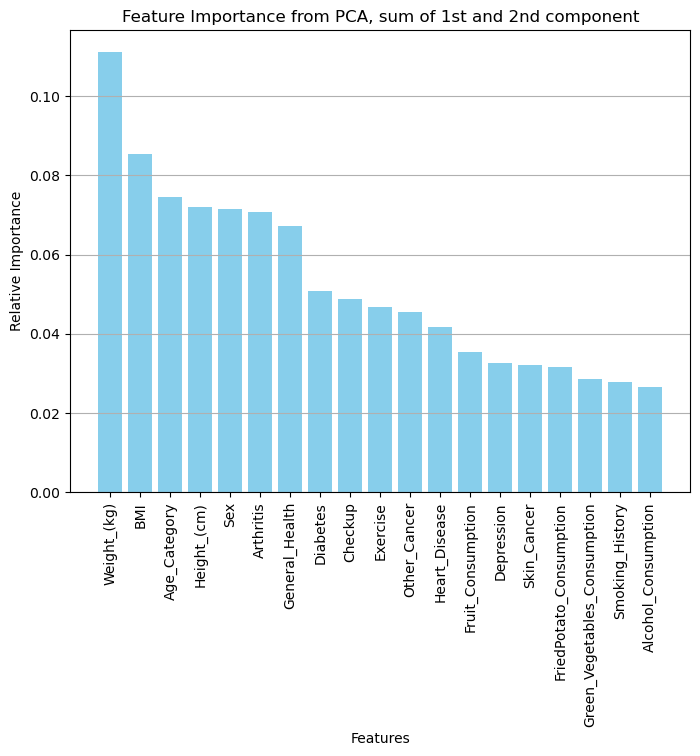

In [6]:
components = np.abs(pca.components_)  # Absolute value of eigenvectors
print(components.sum(axis=0))

# Compute total importance of each feature
feature_importance = components.sum(axis=0)
# Normalize importance (optional)
feature_importance_normalized = feature_importance / feature_importance.sum()
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_normalized
}).sort_values(by='Importance', ascending=False)

#print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from PCA, sum of 1st and 2nd component')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

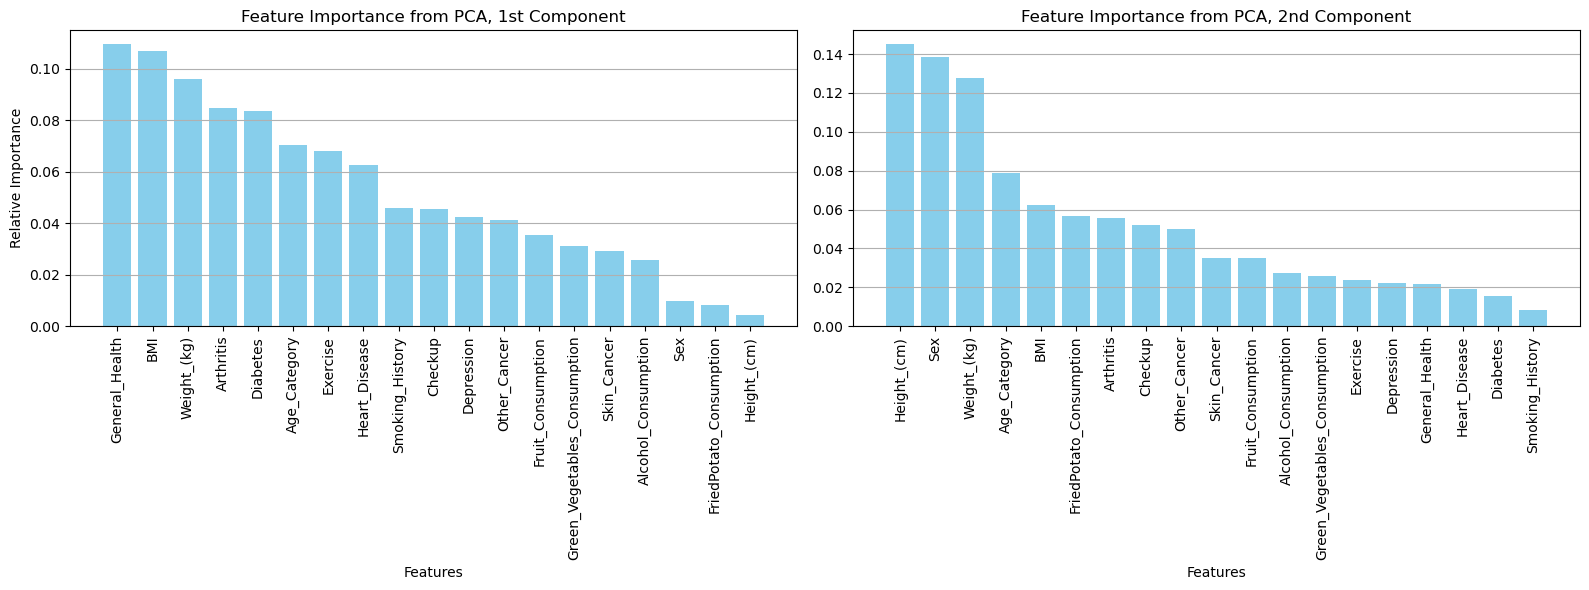

In [7]:
components = np.abs(pca.components_)  # Absolute value of eigenvectors
#print(components)

# Compute total importance of each feature
feature_importance_1 = components[0]
feature_importance_2 = components[1]
# Normalize importance (optional)
feature_importance_1_normalized = feature_importance_1 / feature_importance_1.sum()
feature_importance_2_normalized = feature_importance_2 / feature_importance_2.sum()
# Create a DataFrame for better visualization
importance_1_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_1_normalized
}).sort_values(by='Importance', ascending=False)

importance_2_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_2_normalized
}).sort_values(by='Importance', ascending=False)

#print(importance_df)

# Plot feature importance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the first feature importance bar chart on the first axis
axes[0].bar(importance_1_df['Feature'], importance_1_df['Importance'], color='skyblue')
axes[0].set_title('Feature Importance from PCA, 1st Component')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Relative Importance')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y')

# Plot the second feature importance bar chart on the second axis
axes[1].bar(importance_2_df['Feature'], importance_2_df['Importance'], color='skyblue')
axes[1].set_title('Feature Importance from PCA, 2nd Component')
axes[1].set_xlabel('Features')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined figure
plt.show()

## 2. K-means algorithm with standardized_data

### Find out the best k for k-means using the "elbow method"

In [8]:
data_kmeans = standardized_data

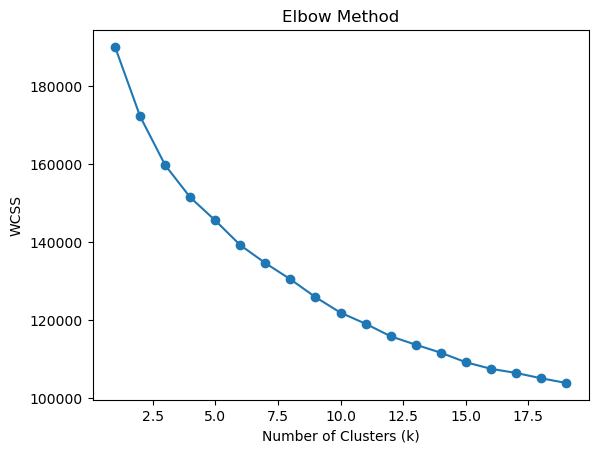

In [9]:
wcss = [] # wcss = Within-Cluster Sum of Squares, measures total variance within each cluster, which we aim to minimize
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # 10 rounds repeat (since performance dependend on random first centers)
    kmeans.fit(data_kmeans)
    wcss.append(kmeans.inertia_) # inertia is wcss for specific k
    
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [10]:
# The optimal point for k seems to be k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# Fit the model
kmeans.fit(data_kmeans)
# Get the cluster assignments
y_kmeans = kmeans.predict(data_kmeans)
data_kmeans = pd.DataFrame(data_kmeans, columns = data.columns, index=data.index)
data_kmeans['Cluster assignment'] = y_kmeans

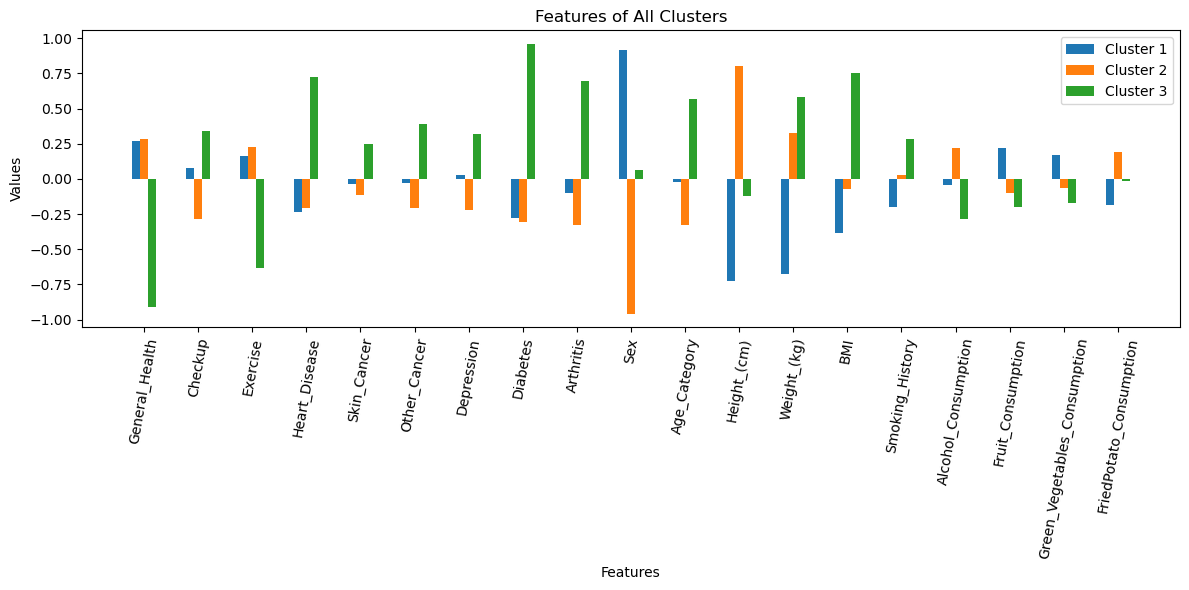

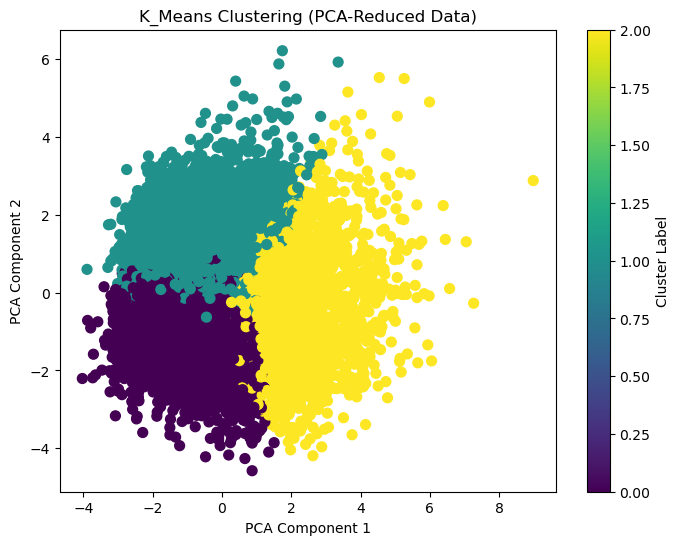

In [11]:
clusters = []
for i in range(0, max(data_kmeans['Cluster assignment']) + 1):
    clusters.append(np.mean(data_kmeans[data_kmeans['Cluster assignment'] == i], axis=0)[:-1])

num_clusters = len(clusters)
bar_width = 0.15  # Width of each bar
x_positions = np.arange(len(clusters[0]))  # Base x positions (for features)

plt.figure(figsize=(12, 6))  # Set figure size

# Loop through each cluster to plot its bars
for i in range(num_clusters):
    # Offset the x positions for each cluster's bars
    plt.bar(x_positions + i * bar_width, clusters[i], width=bar_width, label=f"Cluster {i+1}")

# Add titles, labels, and legend
plt.title("Features of All Clusters")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(x_positions + (num_clusters - 1) * bar_width / 2, clusters[0].index, rotation=80)  # Center tick labels
plt.legend()

plt.tight_layout()
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
X = np.array(scaled_data)
labels = data_kmeans['Cluster assignment']

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title("K_Means Clustering (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [12]:
dataKMeans = normalized_data.copy()
dataKMeans["KMeans_Cluster"] = data_kmeans['Cluster assignment']

summary = dataKMeans.groupby('KMeans_Cluster').mean().sort_values('Heart_Disease', ascending=False)
#summary = data_kmeans.groupby('Cluster assignment').mean().sort_values('Heart_Disease', ascending=False)

determining_features = []
# Iterate through each cluster
for i in range(len(summary)):
    features = []  # List to store features for the current cluster
    for j in range(len(summary.columns)):
        # Check if the value is 1 or 0
        if summary.iloc[i, j] >= 0.99 or summary.iloc[i, j] <= 0.01:
            features.append(summary.columns[j])  # Add the feature name
    determining_features.append(features)  # Append the features list for the current cluster

# Add the new column with determining features to the DataFrame
summary['Determining features'] = determining_features
summary['Increased risk of heart disease (in %)'] = ((summary['Heart_Disease'] / np.mean(data['Heart_Disease']) - 1) * 100).round(0)
summary['Count'] = dataKMeans.groupby('KMeans_Cluster').count()['General_Health']
summary.round(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Determining features,Increased risk of heart disease (in %),Count
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
2,0.397,0.973,0.513,0.273,0.170,0.213,0.335,0.476,0.650,0.545,...,0.318,0.234,0.547,0.089,0.206,0.105,0.051,[],250.0,2337
1,0.708,0.847,0.871,0.023,0.064,0.036,0.116,0.035,0.171,0.036,...,0.291,0.170,0.420,0.223,0.227,0.118,0.066,[],-71.0,3821
0,0.703,0.919,0.844,0.014,0.086,0.089,0.218,0.043,0.278,0.971,...,0.184,0.146,0.310,0.152,0.291,0.147,0.039,[],-82.0,3842


In [13]:
pd.crosstab(data_kmeans['Cluster assignment'], trainCrit)

Heart_Disease,0,1
Cluster assignment,,
0,3788,54
1,3734,87
2,1700,637


BMI                             1.068167
Weight_(kg)                     1.056934
Diabetes                        1.028419
Arthritis                       0.819424
Heart_Disease                   0.774601
Age_Category                    0.646707
Smoking_History                 0.420529
Checkup                         0.415335
Other_Cancer                    0.391556
Depression                      0.311964
Skin_Cancer                     0.265654
Height_(cm)                     0.221783
FriedPotato_Consumption         0.166432
Green_Vegetables_Consumption   -0.265054
Sex                            -0.271484
Alcohol_Consumption            -0.277911
Fruit_Consumption              -0.315639
Exercise                       -0.698175
General_Health                 -1.090159
dtype: float64


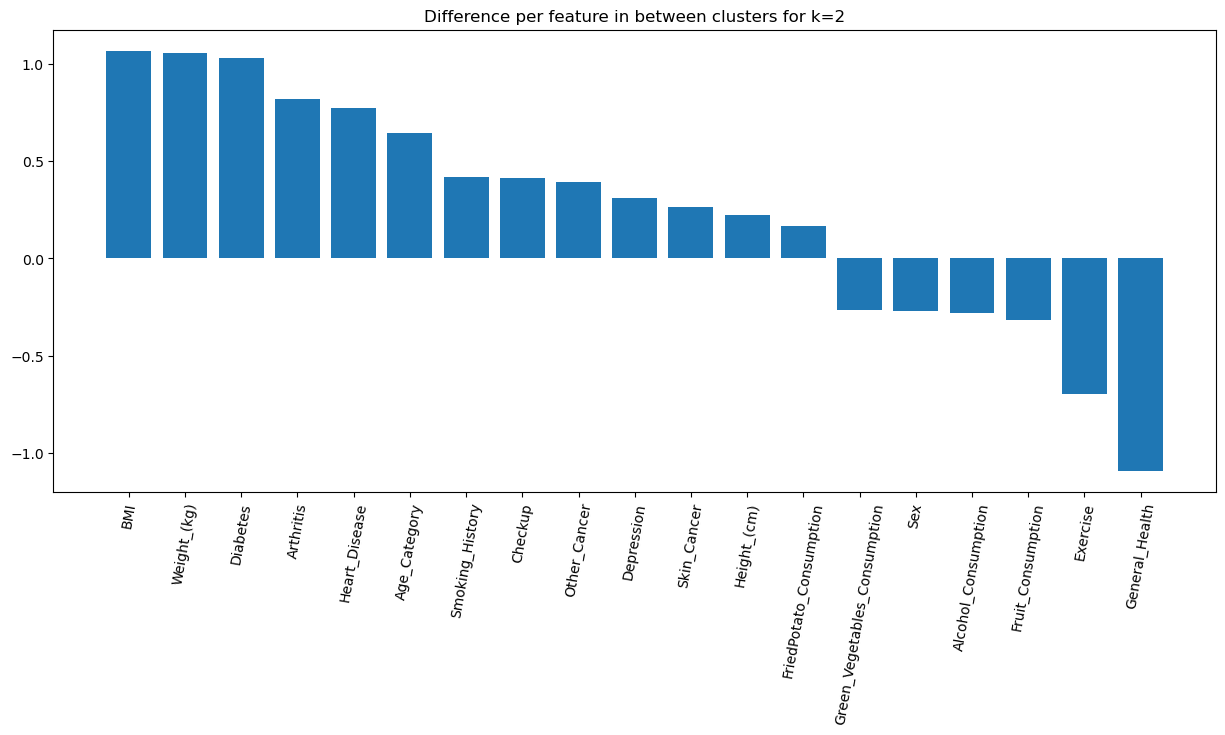

In [14]:
# only possible if k=2
# The optimal point for k seems to be k=3
kmeans = KMeans(n_clusters=2, random_state=13, n_init=10)
# Fit the model
kmeans.fit(data_kmeans)
# Get the cluster assignments
y_kmeans = kmeans.predict(data_kmeans)
data_kmeans['Cluster assignment'] = y_kmeans

clusters = []
for i in range(0, max(data_kmeans['Cluster assignment']) + 1):
    clusters.append(np.mean(data_kmeans[data_kmeans['Cluster assignment'] == i], axis=0)[:-1])

# get difference
s1, s2 = clusters    
difference = s2 -s1

difference = difference.sort_values(ascending=False)
print(difference)

#x_position = list(difference.index).index("Green_Vegetables_Consumption")-0.5
#print(x_position)
plt.figure(figsize=(15, 6))
plt.bar(difference.index, difference)
#plt.axvline(x=x_position, color='red', linestyle='--', linewidth=2)
plt.title(f"Difference per feature in between clusters for k=2")
plt.xticks(rotation=80)  # Rotate the labels 45 degrees
plt.show()

## 2. K-means algorithm with normalized data

In [15]:
data_kmeans = normalized_data.copy()

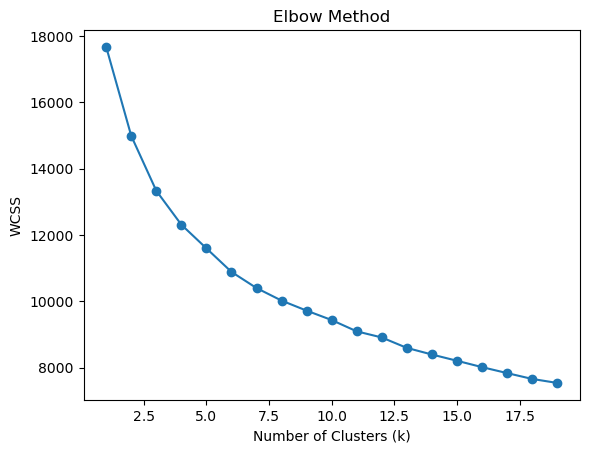

In [16]:
wcss = [] # wcss = Within-Cluster Sum of Squares, measures total variance within each cluster, which we aim to minimize
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # 10 rounds repeat (since performance dependend on random first centers)
    kmeans.fit(data_kmeans)
    wcss.append(kmeans.inertia_) # inertia is wcss for specific k
    
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [17]:
# The optimal point for k seems to be k=3
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
# Fit the model
kmeans.fit(data_kmeans)
# Get the cluster assignments
y_kmeans = kmeans.predict(data_kmeans)
data_kmeans = pd.DataFrame(data_kmeans, columns = data.columns, index=data.index)
data_kmeans['Cluster assignment'] = y_kmeans

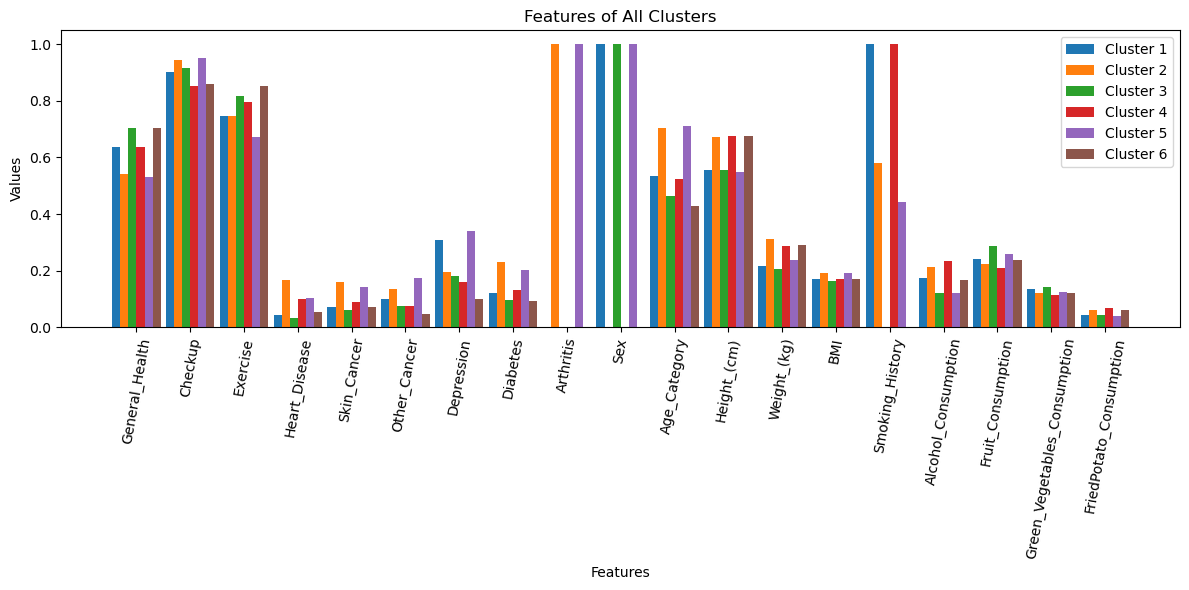

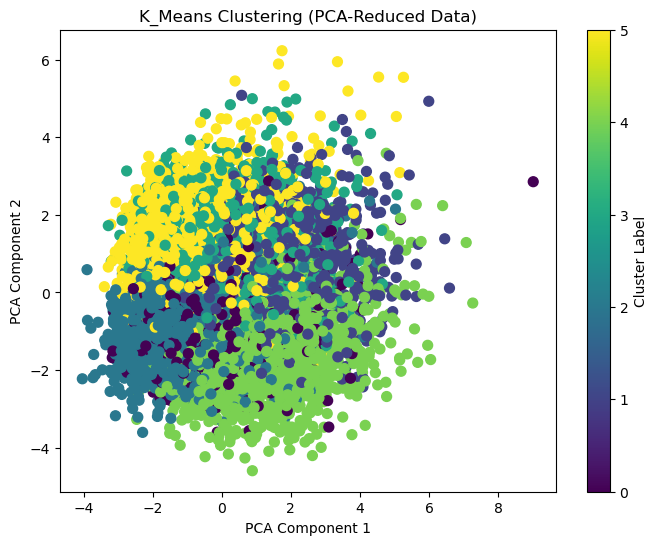

In [18]:
clusters = []
for i in range(0, max(data_kmeans['Cluster assignment']) + 1):
    clusters.append(np.mean(data_kmeans[data_kmeans['Cluster assignment'] == i], axis=0)[:-1])

num_clusters = len(clusters)
bar_width = 0.15  # Width of each bar
x_positions = np.arange(len(clusters[0]))  # Base x positions (for features)

plt.figure(figsize=(12, 6))  # Set figure size

# Loop through each cluster to plot its bars
for i in range(num_clusters):
    # Offset the x positions for each cluster's bars
    plt.bar(x_positions + i * bar_width, clusters[i], width=bar_width, label=f"Cluster {i+1}")

# Add titles, labels, and legend
plt.title("Features of All Clusters")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(x_positions + (num_clusters - 1) * bar_width / 2, clusters[0].index, rotation=80)  # Center tick labels
plt.legend()

plt.tight_layout()
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
X = np.array(scaled_data)
labels = data_kmeans['Cluster assignment']

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title("K_Means Clustering (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [19]:
dataKMeans = normalized_data.copy()
dataKMeans["KMeans_Cluster"] = data_kmeans['Cluster assignment']

summary = dataKMeans.groupby('KMeans_Cluster').mean().sort_values('Heart_Disease', ascending=False)
#summary = data_kmeans.groupby('Cluster assignment').mean().sort_values('Heart_Disease', ascending=False)

determining_features = []
# Iterate through each cluster
for i in range(len(summary)):
    features = []  # List to store features for the current cluster
    for j in range(len(summary.columns)):
        # Check if the value is 1 or 0
        if summary.iloc[i, j] >= 0.99 or summary.iloc[i, j] <= 0.01:
            features.append(summary.columns[j])  # Add the feature name
    determining_features.append(features)  # Append the features list for the current cluster

# Add the new column with determining features to the DataFrame
summary['Determining features'] = determining_features
summary['Increased risk of heart disease (in %)'] = ((summary['Heart_Disease'] / np.mean(data['Heart_Disease']) - 1) * 100).round(0)
summary['Count'] = dataKMeans.groupby('KMeans_Cluster').count()['General_Health']
summary.round(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Determining features,Increased risk of heart disease (in %),Count
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
1,0.542,0.944,0.747,0.165,0.161,0.135,0.197,0.231,1.0,0.0,...,0.312,0.191,0.582,0.214,0.225,0.121,0.061,"[Arthritis, Sex]",113.0,1318
4,0.532,0.951,0.673,0.102,0.143,0.172,0.342,0.203,1.0,1.0,...,0.237,0.193,0.444,0.122,0.259,0.125,0.039,"[Arthritis, Sex]",31.0,1920
3,0.639,0.854,0.797,0.098,0.089,0.073,0.161,0.131,0.0,0.0,...,0.287,0.171,1.000,0.234,0.209,0.113,0.067,"[Arthritis, Sex, Smoking_History]",26.0,1460
5,0.704,0.859,0.851,0.052,0.072,0.046,0.098,0.093,0.0,0.0,...,0.289,0.171,0.000,0.168,0.237,0.120,0.061,"[Arthritis, Sex, Smoking_History]",-33.0,2080
0,0.636,0.904,0.746,0.043,0.072,0.101,0.307,0.120,0.0,1.0,...,0.215,0.170,1.000,0.174,0.241,0.136,0.044,"[Arthritis, Sex, Smoking_History]",-44.0,995
2,0.704,0.915,0.816,0.031,0.061,0.073,0.181,0.097,0.0,1.0,...,0.206,0.163,0.000,0.119,0.287,0.141,0.044,"[Arthritis, Sex, Smoking_History]",-60.0,2227


In [20]:
pd.crosstab(data_kmeans['Cluster assignment'], trainCrit)

Heart_Disease,0,1
Cluster assignment,,
0,952,43
1,1100,218
2,2157,70
3,1317,143
4,1724,196
5,1972,108


# 3. DBSCAN algorithm

In [21]:
dbscan_data = standardized_data.copy()

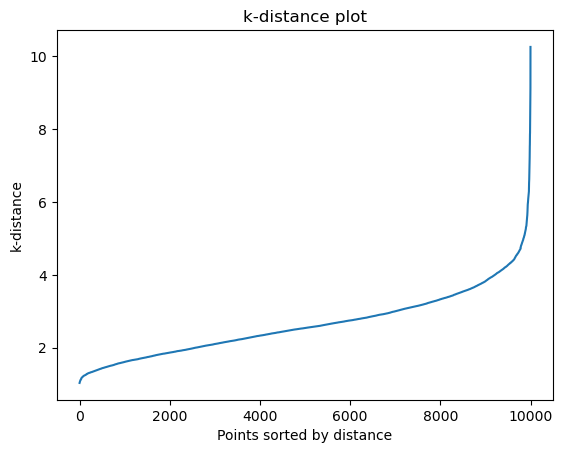

In [22]:
neighbors = NearestNeighbors(n_neighbors=20)
X = np.array(dbscan_data)
neighbors_fit = neighbors.fit(X)  # X is your dataset
distances, _ = neighbors_fit.kneighbors(X)

# Sort distances
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance plot")
plt.show()

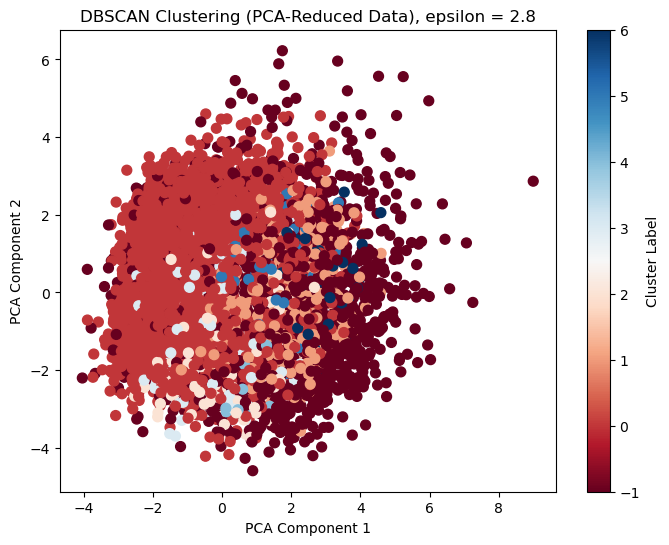

In [23]:
X = np.array(dbscan_data)
#X, _ = make_blobs(n_samples=200, n_features=19, centers=3, random_state=42)
epsilon = 2.8
dbscan = DBSCAN(eps=epsilon, min_samples=20)
labels = dbscan.fit_predict(X)
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='RdBu', s=50)
plt.colorbar(label='Cluster Label')
plt.title(f"DBSCAN Clustering (PCA-Reduced Data), epsilon = {epsilon}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [24]:
columnsNewOrder = ['Heart_Disease', 'Alcohol_Consumption', 'Other_Cancer', 'Skin_Cancer','Depression', 'Diabetes',
                   'Smoking_History',  'Arthritis', 'Fruit_Consumption',
                    'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
                    'Sex', 'General_Health', 'Exercise', 'Checkup',   
                    'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', ]

pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.514968,0.474417,0.535880,3.442887,-0.328497,-0.328684,-0.509514,-0.405649,1.445104,0.971992,1.546469,-1.750148,-1.823069,-1.423772,1.205814,-0.367069,-0.552901,-1.011771,1.135163
1,0.450114,0.474417,0.535880,-0.290454,-0.328497,-0.328684,-0.509514,-0.405649,-0.691992,0.971992,-1.904650,-1.001478,-0.515402,-0.033815,-0.829315,0.008283,-0.552901,-0.744381,1.135163
2,-1.480050,0.474417,0.535880,-0.290454,-0.328497,-0.328684,-0.509514,-0.405649,1.445104,-1.028815,0.980712,1.338117,1.092944,0.376538,-0.829315,-0.617303,0.015384,0.057790,-0.263122
3,0.450114,-0.764916,-1.866091,-0.290454,-0.328497,-0.328684,-0.509514,2.465186,1.445104,0.971992,0.980712,0.215112,-0.708290,-0.863778,1.205814,3.136211,0.015384,0.993655,1.018639
4,0.450114,0.474417,0.535880,-0.290454,-0.328497,-0.328684,-0.509514,-0.405649,1.445104,0.971992,0.980712,-1.469397,-1.051517,-0.470394,-0.829315,-0.241952,2.450893,-0.944923,-0.729217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.450114,-3.243583,-1.866091,-0.290454,-0.328497,-0.328684,-0.509514,-0.405649,-0.691992,-1.028815,-1.565196,1.150950,1.951012,1.348428,-0.829315,-0.617303,-1.161778,-0.878076,-0.263122
9996,-0.514968,-0.764916,0.535880,-0.290454,-0.328497,-0.328684,1.962655,-0.405649,-0.691992,-1.028815,-1.282317,-0.065640,-0.450633,-0.467309,-0.829315,-0.617303,1.233138,-0.744381,-0.263122
9997,0.450114,0.474417,0.535880,3.442887,-0.328497,3.042435,-0.509514,-0.405649,1.445104,-1.028815,0.980712,0.215112,0.406962,0.356483,1.205814,-0.492186,2.450893,2.999081,-0.729217
9998,0.450114,0.474417,0.535880,-0.290454,-0.328497,-0.328684,-0.509514,-0.405649,1.445104,-1.028815,0.980712,-0.533559,-0.086131,0.214556,-0.829315,-0.492186,1.233138,0.993655,0.202973


In [25]:
dataOrder = pd.DataFrame(normalized_data, columns = data.columns, index=data.index).copy()
dataOrder["DBSCAN_Cluster"] = labels
summariesGrouped = dataOrder.groupby("DBSCAN_Cluster").agg(["mean"])

determining_features = []
# Iterate through each cluster
for i in range(len(summariesGrouped)):
    features = []  # List to store features for the current cluster
    for j in range(len(summariesGrouped.columns)):
        # Check if the value is 1 or 0
        if summariesGrouped.iloc[i, j] >= 0.99 or summariesGrouped.iloc[i, j] <= 0.01:
            features.append(summariesGrouped.columns[j])  # Add the feature name
    determining_features.append(features)  # Append the features list for the current cluster

summariesGrouped['Determining features'] = determining_features
summariesGrouped['Increased risk of heart disease (in %)'] = ((summary['Heart_Disease'] / np.mean(data['Heart_Disease']) - 1) * 100).round(0)
summariesGrouped['Count'] = dataOrder.groupby("DBSCAN_Cluster").count()['General_Health']
summariesGrouped

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Determining features,Increased risk of heart disease (in %),Count
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,,,
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,
-1,0.478735,0.898591,0.551302,0.304625,0.303562,0.315789,0.373737,0.345029,0.528442,0.506114,...,0.284715,0.200917,0.541733,0.210810,0.264000,0.160416,0.077246,[],NaN,1881
0,0.689769,0.887062,0.829196,0.000000,0.000000,0.000000,0.185541,0.000000,0.244182,0.512566,...,0.247056,0.167723,0.365498,0.165513,0.243867,0.119035,0.048750,"[(Heart_Disease, mean), (Skin_Cancer, mean), (...",-44.0,6446
1,0.521662,0.985085,0.755682,0.000000,0.000000,0.000000,0.176136,1.000000,0.404830,0.561080,...,0.289663,0.209910,0.397727,0.065436,0.229048,0.110736,0.037760,"[(Heart_Disease, mean), (Skin_Cancer, mean), (...",113.0,704
2,0.619114,0.972299,0.839335,0.000000,0.000000,1.000000,0.047091,0.000000,0.398892,0.659280,...,0.226567,0.161017,0.426593,0.105448,0.241066,0.114958,0.032964,"[(Heart_Disease, mean), (Skin_Cancer, mean), (...",-60.0,361
3,0.729765,0.960183,0.887728,0.000000,1.000000,0.000000,0.039164,0.000000,0.347258,0.532637,...,0.217784,0.145999,0.375979,0.194952,0.269865,0.128525,0.039077,"[(Heart_Disease, mean), (Skin_Cancer, mean), (...",26.0,383
4,0.650000,0.987500,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.950000,0.850000,...,0.182416,0.137264,0.100000,0.181667,0.267083,0.115000,0.028750,"[(Exercise, mean), (Heart_Disease, mean), (Ski...",31.0,20
5,0.558621,0.986207,0.937931,1.000000,0.000000,0.000000,0.034483,0.000000,0.393103,0.179310,...,0.268789,0.167596,0.537931,0.106207,0.223908,0.115747,0.039885,"[(Heart_Disease, mean), (Skin_Cancer, mean), (...",-33.0,145
6,0.383333,0.995833,0.933333,1.000000,0.000000,0.000000,0.016667,1.000000,0.533333,0.100000,...,0.296381,0.190067,0.700000,0.055556,0.173750,0.074722,0.035972,"[(Checkup, mean), (Heart_Disease, mean), (Skin...",NaN,60


In [26]:
hdClusters = summariesGrouped[summariesGrouped['Heart_Disease']['mean'] == 1]
list1 = hdClusters.iloc[0].tolist()[:-3]
list2 = hdClusters.iloc[1].tolist()[:-3]

# Perform element-wise subtraction using NumPy
result = np.array(list1) - np.array(list2)
index_names = [i[0] for i in hdClusters.columns][:-3]
print(result)

[ 0.17528736 -0.00962644  0.0045977   0.          0.          0.
  0.01781609 -1.         -0.14022989  0.07931034 -0.01003392  0.00220464
 -0.02759211 -0.02247086 -0.16206897  0.05065134  0.05015805  0.0410249
  0.00391284]


In [27]:
hdClusters

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Determining features,Increased risk of heart disease (in %),Count
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,,,
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,
5,0.558621,0.986207,0.937931,1.0,0.0,0.0,0.034483,0.0,0.393103,0.17931,...,0.268789,0.167596,0.537931,0.106207,0.223908,0.115747,0.039885,"[(Heart_Disease, mean), (Skin_Cancer, mean), (...",-33.0,145
6,0.383333,0.995833,0.933333,1.0,0.0,0.0,0.016667,1.0,0.533333,0.10000,...,0.296381,0.190067,0.700000,0.055556,0.173750,0.074722,0.035972,"[(Checkup, mean), (Heart_Disease, mean), (Skin...",NaN,60


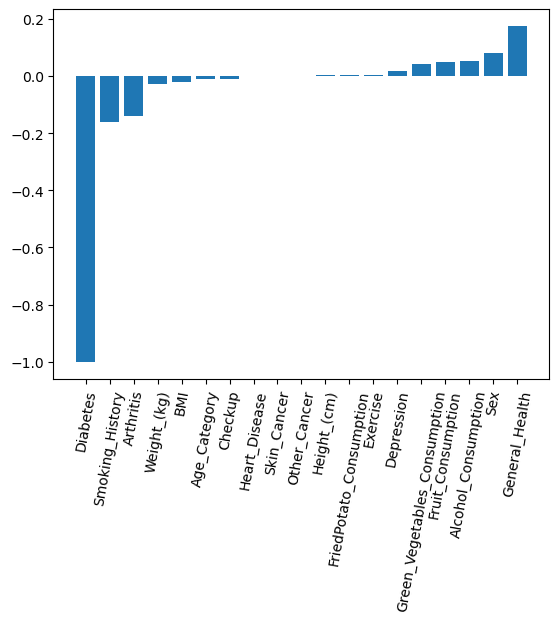

In [28]:
# Create a DataFrame for sorting
sorting_data = pd.DataFrame({"Index": index_names, "Result": result})

# Sort by the 'Result' column
sorting_data = sorting_data.sort_values(by="Result", ascending=True)

# Extract sorted values
sorted_index_names = sorting_data["Index"].tolist()
sorted_result = sorting_data["Result"].tolist()

# Plot sorted data
plt.bar(sorted_index_names, sorted_result)
plt.xticks(rotation=80)
plt.show()

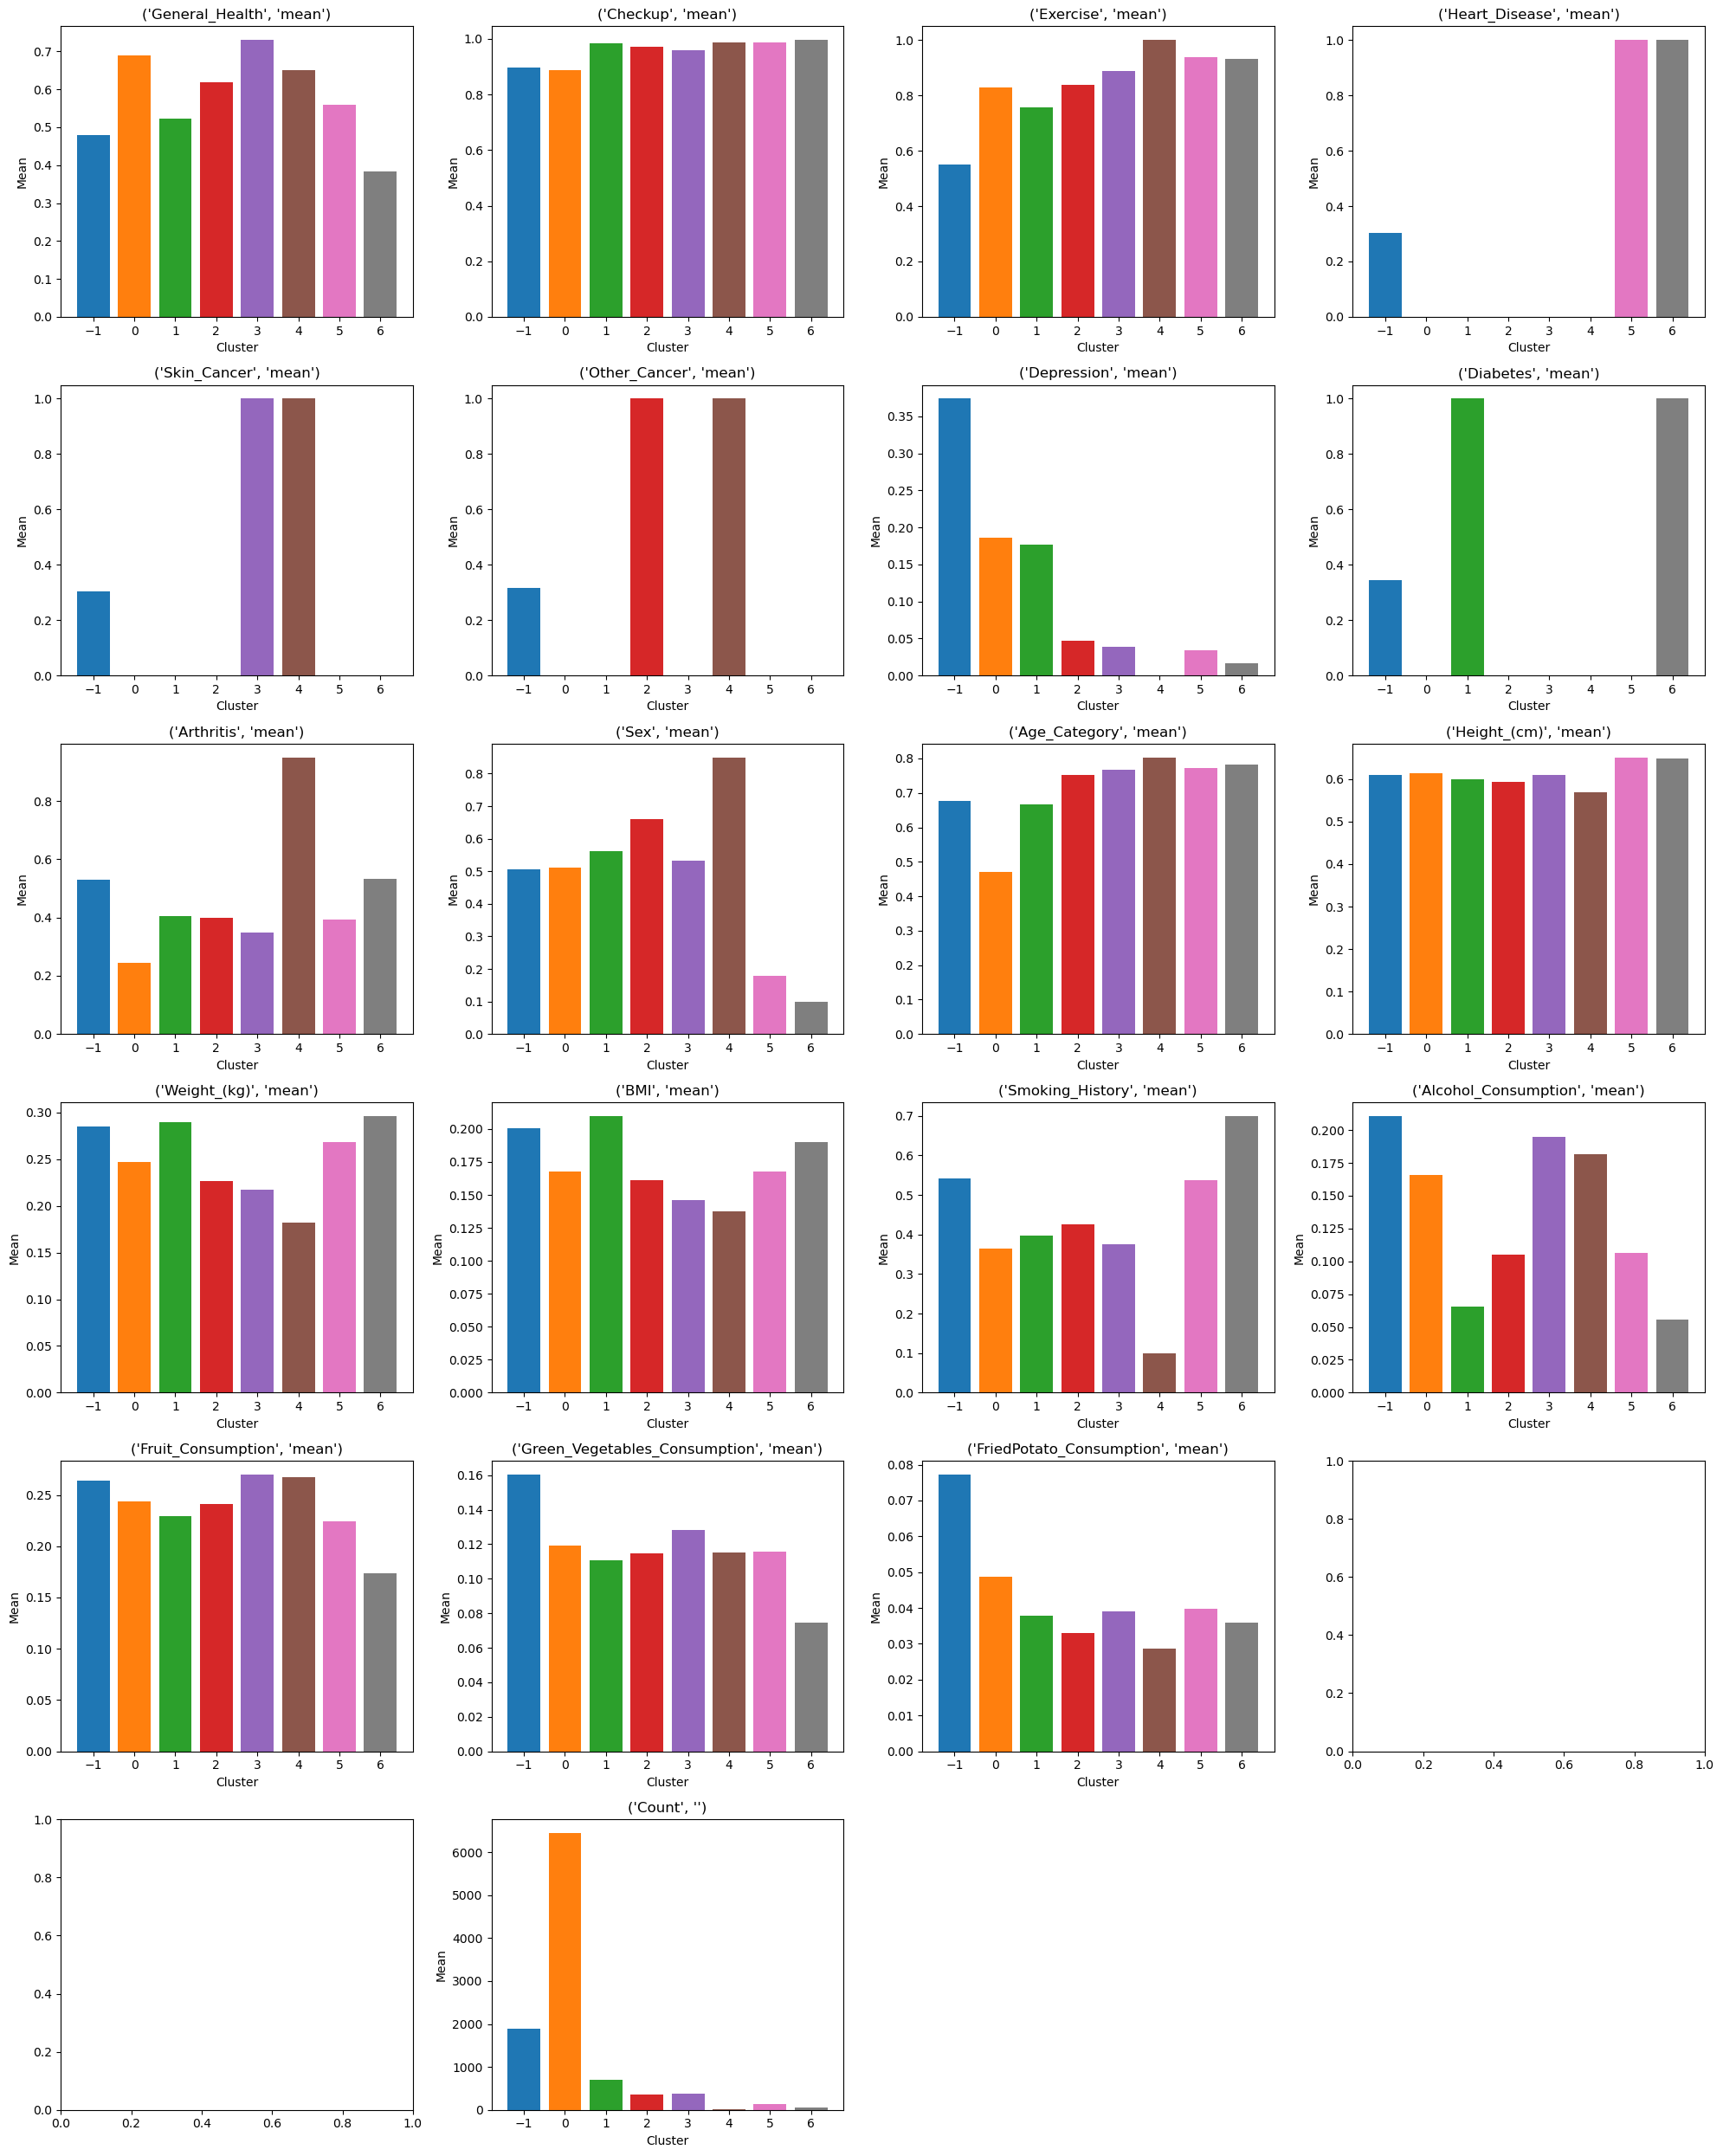

In [29]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 25))  
axes = axes.flatten()

# List of columns to exclude
exclude_cols = summariesGrouped.columns[-3:-1]  # Last two columns

for i, col in enumerate(summariesGrouped.columns):
    if col in exclude_cols:  # Skip second-to-last and third-to-last columns
        continue
    
    for j in range(len(summariesGrouped)):
        axes[i].bar(summariesGrouped.index[j], summariesGrouped[col].iloc[j])  # First bar
    
    axes[i].set_title(col)  # Title for each subplot
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Mean')

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()